In [1]:
# import datetime
import fnmatch
# import matplotlib.cbook
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np
import os
import glob
# import pandas as pd
import pickle
import platform
# from pylab import rcParams
# import scipy
# from scipy import stats
# import warnings


# warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
# startTimeNotebook = datetime.datetime.now()
# if 'COLAB_GPU' in os.environ:
#     !git clone https://github.com/HeathenToaster/code
#     %cd code
    
os.chdir('..')
# # session lists in a .py file
# import sessionlists
%run sessionlists
from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/test.mplstyle')

In [4]:
%run sessionlists

In [2]:
#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/ALLDATA"
    savePath="/home/david/Desktop/Save"
elif platform.system()=='Darwin':
    root="/Users/tom/Desktop/sequencesALLDATA"
    savePath="/Users/tom/Desktop/Save"
if 'COLAB_GPU' in os.environ:
    !gdown --id 1BSepSzm1-KQJlUvv8C23p_qyHvtzvrZ8
    !unzip -qq /content/code/sequencesALLDATA.zip
    root="/content/code/sequencesALLDATA"
    savePath="/content/Save"
    print("I'm running on Colab")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)
print("Save Path: ", savePath)

print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/david/Desktop/ALLDATA
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save
Found 26 rats in the data folder


In [5]:
rat_markers = {}
sequence = {}

pfPOS = {'RatF00':TM1_pfPOS, 'RatF01':TM1_pfPOS, 'RatF02':TM1_pfPOS, 'RatF03':TM1_pfPOS, 
         'RatM00':TM2_pfPOS, 'RatM01':TM2_pfPOS, 'RatM02':TM2_pfPOS, 'RatM03':TM2_pfPOS}
virtualBoundary = {'RatF00':TM1_virtualBoundary, 'RatF01':TM1_virtualBoundary, 'RatF02':TM1_virtualBoundary, 'RatF03':TM1_virtualBoundary, 
                   'RatM00':TM2_virtualBoundary, 'RatM01':TM2_virtualBoundary, 'RatM02':TM2_virtualBoundary, 'RatM03':TM2_virtualBoundary}
TM1_pfPOS = [16.1, 97.3]
TM2_pfPOS = [17.2, 98.1]
TM1_virtualBoundary = [34.55, 80]  # in behav_params, should read_params(root, animal, session, "boundaryLeft")/11 ; read_params(root, animal, session, "boundaryRight")/11, but no change across sessions
TM2_virtualBoundary = [34.55, 80]

# define colors for each rat
palette = {'RatF00': (0.4, 0.0, 0.0), 'RatF01': (0.55, 0.13, 0.13), 'RatF02': (0.8, 0.2, 0.2),
           'RatM00': (0.0, 0.4, 0.0), 'RatM01': (0.13, 0.55, 0.13), 'RatM02': (0.2, 0.8, 0.2),
           'RatF32': (0.8, 0.2, 0.2), 'RatF33': (0.8, 0.2, 0.2),
           'RatM31': (0.13, 0.55, 0.13), 'RatM32': (0.2, 0.8, 0.2), 
           'RatF42': (0.8, 0.2, 0.2), 'RatM40': (0.13, 0.55, 0.13), 'RatM43': (0.2, 0.8, 0.2)}

# define brain status (lesion/CNO/intact) for each rat, used in plots
# needs to be properly implemented, setting is in behav_params for each session.
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF32': 'normal', 'RatF33': 'normal',
               'RatM31': 'normal', 'RatM32': 'normal',
                'RatF42': 'normal', 'RatM40': 'normal', 'RatM43': 'normal'
               }

markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

# define list of rats to be analyzed

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']


for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[palette[animal], markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[palette[animal], markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    # loop over all sessions for each rat and get the pickled preprocessed data. Data is processed in VIGOR_Preprocess.py
    # data (list or list of lists) for each variable is stored in a dictionary with keys (animal, session)
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):

        # get the preprocessed data from the pickle file
        biglesion = True if 'L' in session else False
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p", biglesion=biglesion)


Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43


In [56]:
params = {}
smoothMask = {}
nb_runsBin = {}
rat_markers = {}
speedRunToLeftBin, speedRunToRightBin = {}, {}
timeRunToLeftBin, timeRunToRightBin = {}, {}
maxSpeedLeftBin, maxSpeedRightBin = {}, {}
timeStayInLeftBin, timeStayInRightBin = {}, {}
totalDistance, totalWater, total_trials = {}, {}, {}
XtrackRunToLeftBin, XtrackRunToRightBin = {}, {}
instantSpeedLeftBin, instantSpeedRightBin = {}, {}
trackTimeToLeftBin, trackTimeToRightBin = {}, {}
sequence = {}


palette = {'RatF00': (0.4, 0.0, 0.0), 'RatF01': (0.55, 0.13, 0.13), 'RatF02': (0.8, 0.2, 0.2), 'RatF03': (1, 0.6, 0.6),
            'RatM00': (0.0, 0.4, 0.0), 'RatM01': (0.13, 0.55, 0.13), 'RatM02': (0.2, 0.8, 0.2), 'RatM03': (0.6, 1.0, 0.6)}

# needs to be properly implemented, setting is in behav_params for each session.
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal', 'RatF03': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal', 'RatM03': 'normal'}

animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02',]

for index, animal in enumerate(animalList):
    print(animal)
    if fnmatch.fnmatch(animal, 'RatF*'): rat_markers[animal]=[palette[animal], "$\u2640$", brainstatus_plot(brainstatus[animal])]
    elif fnmatch.fnmatch(animal, 'RatM*'): rat_markers[animal]=[palette[animal], "$\u2642$", brainstatus_plot(brainstatus[animal])]
    elif fnmatch.fnmatch(animal, 'Rat00*'): rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$", brainstatus_plot(brainstatus[animal])]
    else: print("error, this is not a rat you got here")

    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        params[animal, session]     = get_from_pickle(root, animal, session, name="params.p")
        smoothMask[animal, session] = get_from_pickle(root, animal, session, name="mask.p")
        nb_runsBin[animal, session] = get_from_pickle(root, animal, session, name="nbRuns.p")
        speedRunToLeftBin[animal, session],  speedRunToRightBin[animal, session]  = get_from_pickle(root, animal, session, name="avgSpeed.p")
        maxSpeedLeftBin[animal, session],    maxSpeedRightBin[animal, session]    = get_from_pickle(root, animal, session, name="maxSpeed.p")
        timeStayInLeftBin[animal, session],  timeStayInRightBin[animal, session]  = get_from_pickle(root, animal, session, name="timeinZone.p")
        timeRunToLeftBin[animal, session],   timeRunToRightBin[animal, session]   = get_from_pickle(root, animal, session, name="timeRun.p")
        XtrackRunToLeftBin[animal, session], XtrackRunToRightBin[animal, session] = get_from_pickle(root, animal, session, name="trackPos.p")
        instantSpeedLeftBin[animal, session],instantSpeedRightBin[animal, session]= get_from_pickle(root, animal, session, name="trackSpeed.p")
        trackTimeToLeftBin[animal, session], trackTimeToRightBin[animal, session] = get_from_pickle(root, animal, session, name="trackTime.p")
        totalDistance[animal, session],      totalWater[animal, session], total_trials[animal, session] = get_from_pickle(root, animal, session, name="misc.p")



data60, data90, data120 = separate_data(animalList, dist60+dist90+dist120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
datat60, datat90, datat120 = separate_data(animalList, dist60+dist90+dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
sdata60, sdata90, sdata120 = separate_data(animalList, dist60+dist90+dist120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
# sdatat60, sdatat90, sdatat120 = separate_data(animalList, dist60+dist90+dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

datarev20, datarev10, datarev2, data2, data10, data20 = separate_data(animalList, TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, XtrackRunToLeftBin, XtrackRunToRightBin, 'TM_ON', params, 'avgrunspeed', True)
datatrev20, datatrev10, datatrev2, datat2, datat10, datat20 = separate_data(animalList, TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, trackTimeToLeftBin, trackTimeToRightBin, 'TM_ON', params, 'avgrunspeed', True)
sdatarev20, sdatarev10, sdatarev2, sdata2, sdata10, sdata20 = separate_data(animalList, TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, instantSpeedLeftBin, instantSpeedRightBin, 'TM_ON', params, 'avgrunspeed', True)
# sdatarevt20, sdatarevt10, sdatarevt2, sdatat2, sdatat10, sdatat20 = separate_data(animalList, TM20+TM10+TM2+TMrev2+TMrev10+TMrev20, trackTimeToLeftBin, trackTimeToRightBin, 'TM_ON', params, 'avgrunspeed', True)


RatF00
RatF01
RatF02
RatM00
RatM01
RatM02


/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


In [98]:
# from VIGOR_Functions import plot_tracks
from VIGOR_Functions import compute_median_trajectory

def plot_speed(posdataRight, timedataRight, xylim,
                color, xyLabels=["", ""], ax=None):

    if ax is None:
        ax = plt.gca()

    for pos, time in zip(posdataRight, timedataRight):
        t = np.subtract(time, time[0])
        abs_speed = [abs(_) for _ in pos]
        ax.plot(t, abs_speed, color=color[0], linewidth=0.2, alpha=0.5)

    ax.set_xlabel(xyLabels[0])
    ax.set_ylabel(xyLabels[1])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    return ax

def removeTMspeed(datap, datas, TMspeed, pfPOS, virtualBoundary, k=.5):
    def _correctTM(x, k=k, mu1=20, mu2=85, amp=20):
        """remove treadmill speed between platform and virtual boundary (approximation of the Heaviside function)
        Args:
            x: scalar, position 
            k: scalar, steepness of the function 
            mu1: scalar, start location, end of platform
            mu2: scalar, end location, virutal boundary location
            amp: scalar, height of the  function, treadmill speed
        Returns:
            p: scalar, f(x)
        """  
        LEFT = 1/(1+np.exp(-k*(x-mu1)))
        RIGHT = 1/(1+np.exp(k*(x-mu2)))
        return LEFT * RIGHT * amp

    output = copy.deepcopy(datas)

    if np.all([isinstance(dat, float) for dat in datap]):  # if only one run is available
        for j, (pos, speed) in enumerate(zip(datap, datas)):  # loop through time points in a run
            if datap[0] < datap[-1]:  # going to right, treadmill effect when not on left platform until right virtual boundary
                output[j] -= _correctTM(pos, k=k, mu1=pfPOS[0], mu2=virtualBoundary[1], amp=TMspeed)
            elif datap[0] > datap[-1]:  # going to left, treadmill effect when not on right platform until left virtual boundary
                output[j] -= _correctTM(pos, k=k, mu1=virtualBoundary[0], mu2=pfPOS[1], amp=TMspeed)
    else:
        for i, (positionarray, speedarray) in enumerate(zip(datap, datas)):  # loop through individual runs
            for j, (pos, speed) in enumerate(zip(positionarray, speedarray)):  # loop through time points in a run
                if positionarray[0] < positionarray[-1]:  # going to right, treadmill effect when not on left platform until right virtual boundary
                    output[i][j] -= _correctTM(pos, k=k, mu1=pfPOS[0], mu2=virtualBoundary[1], amp=TMspeed)
                elif positionarray[0] > positionarray[-1]:  # going to left, treadmill effect when not on right platform until left virtual boundary
                    output[i][j] -= _correctTM(pos, k=k, mu1=virtualBoundary[0], mu2=pfPOS[1], amp=TMspeed)
    return output


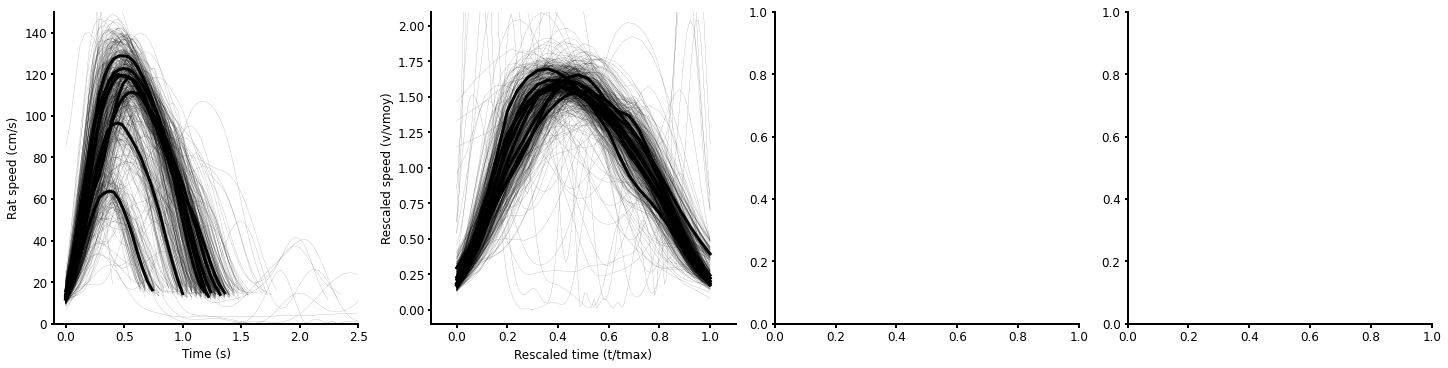

In [97]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

animal = 'RatF01'
index_session_example = -2
index_block_example = 0

# for condition in [dist60, dist90, dist120]:
# for condition in [TM20, TM10, TM2, TMrev10, TMrev20]:
for condition in [dist60, dist90, dist120, TM20, TM10, TM2, TMrev10, TMrev20]:
    session = matchsession(animal, condition)[index_session_example]
    example_time = trackTimeToRightBin[animal, session][index_block_example]

    if session in dist60+dist90+dist120:
        example_speed = instantSpeedRightBin[animal, session][index_block_example]
    
    elif session in TM20+TM10+TM2+TMrev10+TMrev20:
        p = XtrackRunToRightBin[animal, session][index_block_example]
        s = instantSpeedRightBin[animal, session][index_block_example]
        t = trackTimeToRightBin[animal, session][index_block_example]
        tm_speed = params[animal, session]['treadmillSpeed'][index_block_example]
        example_speed = removeTMspeed(p, s, tm_speed, pfPOS[animal], virtualBoundary[animal])

    plot_speed(example_speed, example_time, 
                xylim = [-0.1, 2.5, 0, 150], color='k', 
                xyLabels=["Time (s)","Rat speed (cm/s)"], ax=ax[0]) 

    ax[0].plot(*compute_median_trajectory(example_speed, example_time), 
                color= 'k', lw=3, alpha=1, zorder = 3)


    #rescale
    rescaled_time = copy.deepcopy(example_time)
    for i in range(len(example_time)):
        rescaled_time[i] = np.array(example_time[i])/(example_time[i][-1]-example_time[i][0])

    rescaled_speed = copy.deepcopy(example_speed)
    for i in range(len(example_speed)):
        rescaled_speed[i] = np.array(example_speed[i])/np.nanmean(example_speed[i])

    plot_speed(rescaled_speed, rescaled_time,
                xylim = [-0.1, 1.1, -.1, 2.1], color='k',
                xyLabels=["Rescaled time (t/tmax)","Rescaled speed (v/vmoy)"], ax=ax[1])
    
    ax[1].plot(*compute_median_trajectory(rescaled_speed, rescaled_time), 
                color= 'k', lw=3, alpha=1, zorder = 3)

                

Text(0.55, 0.075, 'vbelt')

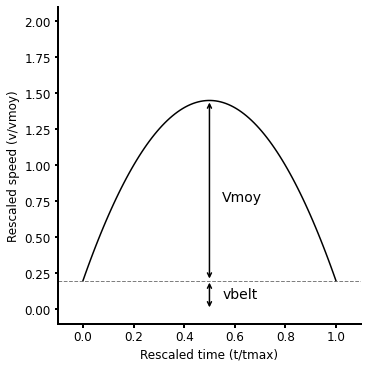

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.set_xlabel("Rescaled time (t/tmax)")
ax.set_ylabel("Rescaled speed (v/vmoy)")
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-.1, 2.1])

VBELT = 0.2
ax.axhline(VBELT, color='k', lw=1, alpha=0.5, linestyle='--')

def _simple_parabola(x, a, b, c):
    return a * x**2 + b * x + c

y = _simple_parabola(np.linspace(0, 1, 100), -5, 5, VBELT)
ax.plot(np.linspace(0, 1, 100), y, color='k')


# ax.arrow(, VBELT, 0, , 
#         width=0.005, length_includes_head=True, head_width=0.05, 
#         head_length=0.1, color='k', zorder=3)


ax.annotate(s='', xy=(np.argmax(y)/100, np.max(y)), 
            xytext=(np.argmax(y)/100, VBELT), 
            arrowprops=dict(arrowstyle='<->', color='k', lw=1.5))
ax.annotate(s='Vmoy', xy=(0.55, 0.75), fontsize=14)

ax.annotate(s='', xy=(np.argmax(y)/100, 0), 
            xytext=(np.argmax(y)/100, VBELT), 
            arrowprops=dict(arrowstyle='<->', color='k', lw=1.5))
ax.annotate(s='vbelt', xy=(0.55, 0.075), fontsize=14)

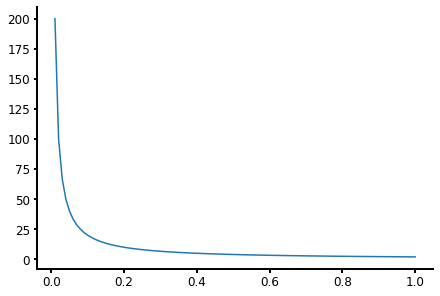

In [144]:
def Rtest(T, D, VBELT):
    return (2*D*D - 2*D*VBELT*T)/T


D = 1
VBELT = 0

T = np.linspace(0.01, 1, 100)
plt.plot(T, Rtest(T, D, VBELT))

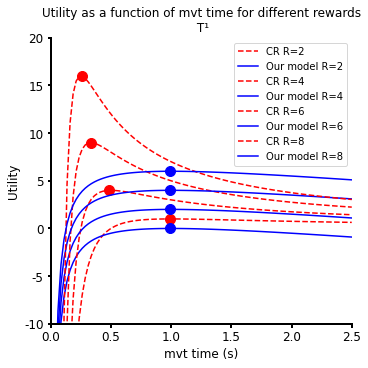

In [192]:
# max((R-E)/T) vs max R-E -T

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

def effort_cost(T, D=1, alpha=1, vbelt=0):
    return alpha * ((D**2 / T) - 2*vbelt*D + vbelt**2 * T)


def utility_CR(R, T, D, VBELT):
    cost = effort_cost(T, D, alpha=1, vbelt=VBELT)
    return (R - cost) / T

def utility_our_model(R, T, D, VBELT, power=1):
    cost = effort_cost(T, D, alpha=1, vbelt=VBELT)
    return R - cost - T**power

T = np.linspace(0.01, 2.5, 100)

for R in [2, 4, 6, 8]:

    ax.plot(T, utility_CR(R, T, 1, 0), label=f'CR R={R}', ls='--', c='r')
    ax.scatter(T[np.argmax(utility_CR(R, T, 1, 0))], np.max(utility_CR(R, T, 1, 0)), color='r', s=100)

    ax.plot(T, utility_our_model(R, T, 1, 0), label=f'Our model R={R}', ls='-', c='b')
    ax.scatter(T[np.argmax(utility_our_model(R, T, 1, 0))], np.max(utility_our_model(R, T, 1, 0)), color='b', s=100)

ax.set_xlabel("mvt time (s)")
ax.set_ylabel("Utility")
ax.set_xlim([0, 2.5])
ax.set_ylim([-10, 20])
ax.set_title("Utility as a function of mvt time for different rewards\n T¹")
ax.legend()


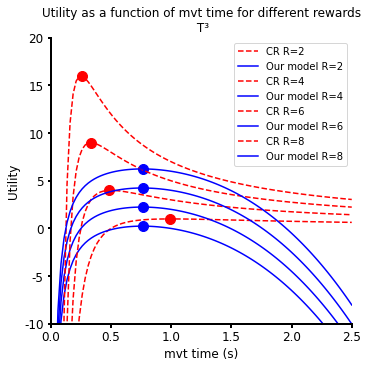

In [191]:
# time cost **3

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

T = np.linspace(0.01, 2.5, 100)
for R in [2, 4, 6, 8]:

    ax.plot(T, utility_CR(R, T, 1, 0), label=f'CR R={R}', ls='--', c='r')
    ax.scatter(T[np.argmax(utility_CR(R, T, 1, 0))], np.max(utility_CR(R, T, 1, 0)), color='r', s=100)

    ax.plot(T, utility_our_model(R, T, 1, 0, power=3), label=f'Our model R={R}', ls='-', c='b')
    ax.scatter(T[np.argmax(utility_our_model(R, T, 1, 0, power=3))], np.max(utility_our_model(R, T, 1, 0, power=3)), color='b', s=100)


ax.set_xlabel("mvt time (s)")
ax.set_ylabel("Utility")
ax.set_xlim([0, 2.5])
ax.set_ylim([-10, 20])
ax.set_title("Utility as a function of mvt time for different rewards\n T³")
ax.legend()


# model predictions

In [4]:
def T_opt_n1(D, vbelt, alpha):
    return (alpha * D * D) / (1 + alpha * vbelt * vbelt)


def T_opt_n3(D, vbelt, alpha):
    _ = np.sqrt(alpha*alpha * vbelt**4 + 12*alpha*D*D)
    Tsq = (_ - alpha * vbelt*vbelt) / 6
    return np.sqrt(Tsq)

def T_opt_CR(D, vbelt, alpha='todo', R=1, ):
    return (2 * D * D) / (R + 2 * D * vbelt)

print(T_opt_n1(1, 0, 1))
print(T_opt_n3(1, 0, 1))
print(T_opt_n3(2, 0, 1))

print(T_opt_CR(1, 0, 1, 1))

1.0
0.7598356856515925
1.074569931823542
2.0


# our model predictions

/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


(0.0, 5.0)

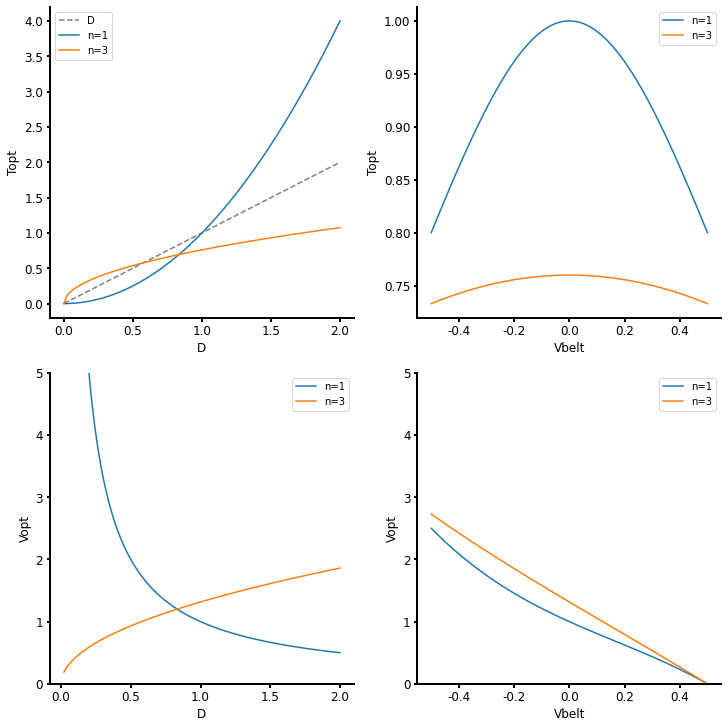

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

D_cst = 1
Vbelt_cst = 0
ALPHA = 1

D = np.linspace(0, 2, 100)
VBELT = np.linspace(.5, -.5, 100)

# Topt as a function of D
axs[0, 0].plot(D, D, alpha=0.5, label='D', linestyle='--', color='k')
axs[0, 0].plot(D, T_opt_n1(D, Vbelt_cst, ALPHA), label='n=1')
axs[0, 0].plot(D, T_opt_n3(D, Vbelt_cst, ALPHA), label='n=3')
axs[0, 0].legend()
axs[0, 0].set_xlabel('D')
axs[0, 0].set_ylabel('Topt')

# Topt as a function of Vbelt
axs[0, 1].plot(VBELT, T_opt_n1(D_cst, VBELT, ALPHA), label='n=1')
axs[0, 1].plot(VBELT, T_opt_n3(D_cst, VBELT, ALPHA), label='n=3')
axs[0, 1].legend()
axs[0, 1].set_xlabel('Vbelt')
axs[0, 1].set_ylabel('Topt')

# Vopt as a function of D
axs[1, 0].plot(D, D/T_opt_n1(D, Vbelt_cst, ALPHA), label='n=1')
axs[1, 0].plot(D, D/T_opt_n3(D, Vbelt_cst, ALPHA), label='n=3')
axs[1, 0].legend()
axs[1, 0].set_xlabel('D')
axs[1, 0].set_ylabel('Vopt')
axs[1, 0].set_ylim(0, 5)

# Vopt as a function of Vbelt
axs[1, 1].plot(VBELT, D/T_opt_n1(D_cst, VBELT, ALPHA), label='n=1')
axs[1, 1].plot(VBELT, D/T_opt_n3(D_cst, VBELT, ALPHA), label='n=3')
axs[1, 1].legend()
axs[1, 1].set_xlabel('Vbelt')
axs[1, 1].set_ylabel('Vopt')
axs[1, 1].set_ylim(0, 5)



# CAPTURE RATE PREDICTIONS

/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


(0.0, 2.5)

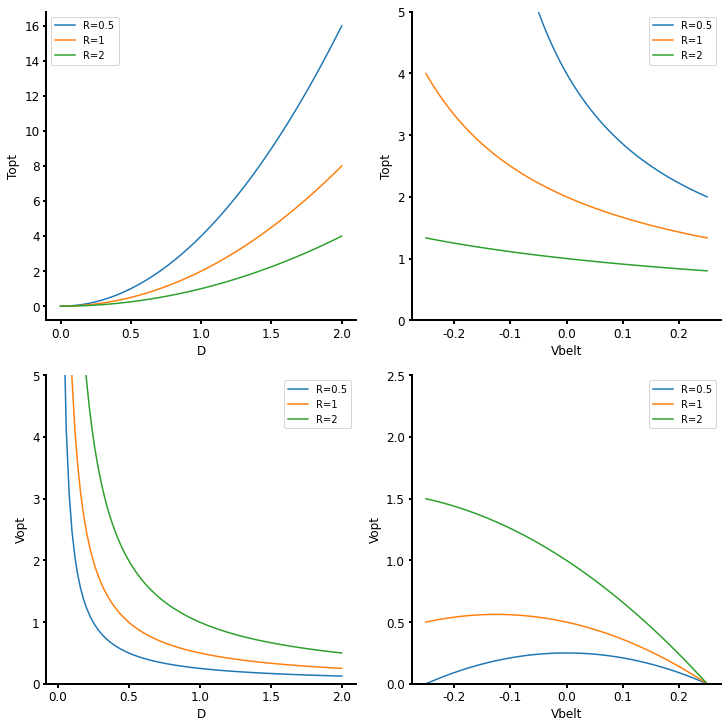

In [10]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10))


# def T_opt_CR(D, vbelt, alpha='todo', R=1, ):


D_cst = 1
Vbelt_cst = 0
ALPHA = 1
RWD = 1

D = np.linspace(0, 2, 100)
VBELT = np.linspace(.25, -.25, 100)

# Topt as a function of D
for r in [0.5, 1, 2]:
    axs[0, 0].plot(D, T_opt_CR(D, Vbelt_cst, ALPHA, r), label=f'R={r}')
axs[0, 0].legend()
axs[0, 0].set_xlabel('D')
axs[0, 0].set_ylabel('Topt')

# Topt as a function of Vbelt
for r in [0.5, 1, 2]:
    axs[0, 1].plot(VBELT, T_opt_CR(D_cst, VBELT, ALPHA, r), label=f'R={r}')
axs[0, 1].legend()
axs[0, 1].set_xlabel('Vbelt')
axs[0, 1].set_ylabel('Topt')
axs[0, 1].set_ylim(0, 5)

# Vopt as a function of D
for r in [0.5, 1, 2]:
    axs[1, 0].plot(D, D/T_opt_CR(D, Vbelt_cst, ALPHA, r), label=f'R={r}')
axs[1, 0].legend()
axs[1, 0].set_xlabel('D')
axs[1, 0].set_ylabel('Vopt')
axs[1, 0].set_ylim(0, 5)

# Vopt as a function of Vbelt
for r in [0.5, 1, 2]:
    axs[1, 1].plot(VBELT, D/T_opt_CR(D_cst, VBELT, ALPHA, r), label=f'R={r}')
axs[1, 1].legend()
axs[1, 1].set_xlabel('Vbelt')
axs[1, 1].set_ylabel('Vopt')
axs[1, 1].set_ylim(0, 2.5)


In [206]:
def effort_cost(T, D=1, alpha=1, vbelt=0):
    return alpha * ((D**2 / T) - 2*vbelt*D + vbelt**2 * T)

def time_cost(T, beta=1, power=1):
    return beta*T ** power


def plot_model(D=1, vbelt=0, alpha=1, beta=1, power=1):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    T = np.linspace(0.1, 2.5, 100)
    ax.plot(T, effort_cost(T, D, alpha, vbelt), label='effort')
    ax.plot(T, time_cost(T, beta, power), label='time')
    ax.plot(T, effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power), label='total')
    # argmin of total cost
    ax.plot(T[np.argmin(effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power))], 
            np.min(effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power)),
            'o', color='k', label='approx min')

    print(f'argmin: {T[np.argmin(effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power))]}')
    # # total derivative
    # dydx = np.diff(effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power))/np.diff(T)
    # ax.plot(T[:-1], dydx, label='total derivative', color='k', linestyle='--', alpha=0.5)

    # ax. axvline(T[np.argmin(effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power))],
    #             linestyle='--', color='k', alpha=0.5)

    ax.set_xlabel('T')
    ax.set_ylabel('cost')
    ax.legend()
    ax.set_title('Cost of a single trial')
    ax.set_ylim(0, 5)


interactive_plot = interactive(plot_model, D=(0, 2, .1), vbelt=(-.2, .2, 0.01), alpha=(0, 5.0, 0.5), beta=(0, 5, 0.5), power=(0, 5, .1))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='D', max=2.0), FloatSlider(value=0.0, description='vb…

(0.0, 10.0)

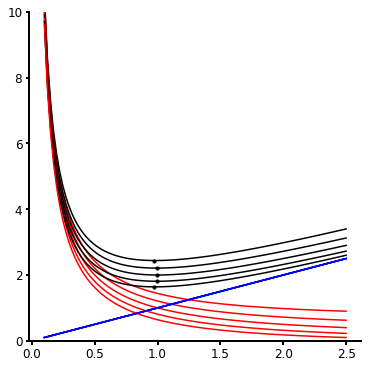

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))


x = np.linspace(-.2, .2, 100)
T = np.linspace(0.1, 2.5, 100)
power =1
for vbelt in [-.2, -.1, 0, .1, .2]:
    C = [effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power)]
    ax.scatter(T[np.argmin(C[0])], np.min(C[0]), color='k', s=10)
    ax.plot(T, C[0], label=f'vbelt={vbelt}', c='k')

    ax.plot(T, effort_cost(T, D, alpha, vbelt), label=f'vbelt={vbelt}', c='r')

    ax.plot(T, time_cost(T, beta, power), label=f'vbelt={vbelt}', c='b')

# ax.plot(x, Topt)

ax.set_ylim(0, 10)

-0.2 0.9727272727272727
-0.1 0.996969696969697
0 0.996969696969697
0.1 0.996969696969697
0.2 0.9727272727272727


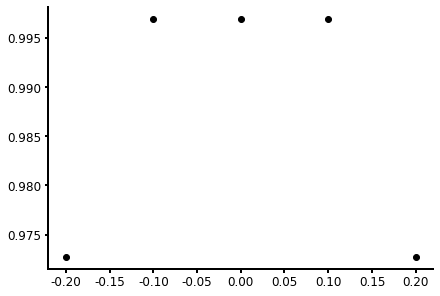

In [236]:
C = [effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power) for vbelt in [-.2, -.1, 0, .1, .2]]
for x, c in zip([-.2, -.1, 0, .1, .2], C):
    plt.plot(x, T[np.argmin(c)], 'o', color='k')
    print(x, T[np.argmin(c)])

1 -0.2 0.9727272727272727
1 -0.1 0.996969696969697
1 0 0.996969696969697
1 0.1 0.996969696969697
1 0.2 0.9727272727272727
2 -0.2 0.7787878787878788
2 -0.1 0.803030303030303
2 0 0.803030303030303
2 0.1 0.803030303030303
2 0.2 0.7787878787878788
3 -0.2 0.7545454545454545
3 -0.1 0.7545454545454545
3 0 0.7545454545454545
3 0.1 0.7545454545454545
3 0.2 0.7545454545454545
4 -0.2 0.7545454545454545
4 -0.1 0.7545454545454545
4 0 0.7545454545454545
4 0.1 0.7545454545454545
4 0.2 0.7545454545454545
5 -0.2 0.7545454545454545
5 -0.1 0.7545454545454545
5 0 0.7545454545454545
5 0.1 0.7545454545454545
5 0.2 0.7545454545454545


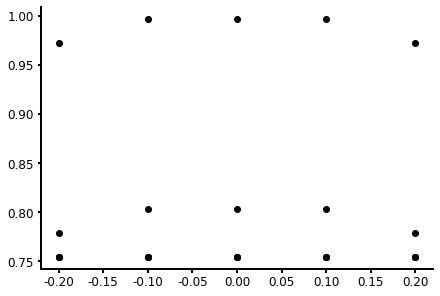

In [237]:
for power in [1, 2, 3, 4, 5]:
    C = [effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power) for vbelt in [-.2, -.1, 0, .1, .2]]
    for x, c in zip([-.2, -.1, 0, .1, .2], C):
        plt.plot(x, T[np.argmin(c)], 'o', color='k')
        print(power, x, T[np.argmin(c)])

[0.9727272727272727, 0.9727272727272727, 0.9727272727272727, 0.9727272727272727, 0.9727272727272727, 0.9727272727272727, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996969696969697, 0.996

Text(0.5, 1.0, 'Topt as a function of vbelt')

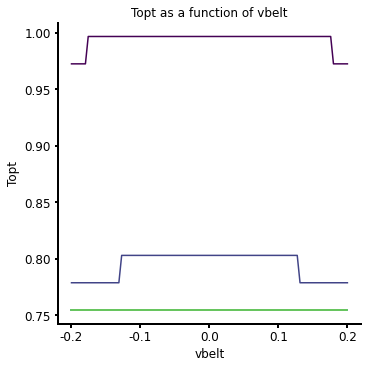

In [203]:
D = 1
alpha = 1
beta = 1

fig, ax = plt.subplots(1, 1, figsize=(5, 5))


for c, power in enumerate([1, 2, 3, 4, 5]):
    x = np.linspace(-.2, .2, 100)
    T = np.linspace(0.1, 2.5, 100)
    Topt = [T[np.argmin(effort_cost(T, D, alpha, vbelt) + time_cost(T, beta, power))] for vbelt in x]
    print(Topt)
    # Topt /= np.max(Topt)
    ax.plot(x, Topt, color=plt.cm.viridis(c/len([1, 2, 3, 4, 5])), label=f'Topt {power}')
ax.set_xlabel('vbelt')
ax.set_ylabel('Topt')
ax.set_title('Topt as a function of vbelt')
